In [2]:
import seaborn as sns
sns.set_theme()

from helpers import write_result, load_malawi_data, split_data, SAVE_PATH

from pathlib import Path

import pandas as pd
import numpy as np

from multiprocessing import Pool

from scipy.stats import norm

path_to_feature_sets = Path('/home/selker/eop/eop/select_predictors/2019')

from pathlib import Path
from multiprocessing import Pool

import numpy as np
import pandas as pd
from opt_targeted_transfers import (
    ConditionalTargetedTransfers,
    HybridTargetedTransfers,
    UnconditionalTargetedTransfers,
    GapTargetedTransfers,
    OracleGapTargetedTransfers,
    OraclePovertyRateTargetedTransfers,
    BinaryTargetedTransfers,
)

from helpers import write_result, load_malawi_data, split_data, SAVE_PATH

full_set_durable_verifiable_covariates = pd.read_csv(
    path_to_feature_sets / 'full_set_durable_verifiable_covariates.csv'
).covariate.values


In [13]:
def generate_predictors(dim=1, n=1000):
    rng = np.random.default_rng()
    return rng.normal(loc=0, scale=1.0, size=(n, dim))

def generate_outcomes(predictors: np.ndarray, coefficients: np.ndarray):

    n_samples = predictors.shape[0]
    n_predictors = predictors.shape[1]

    n_std_predictors = n_predictors // 2
    n_loc_predictors = n_predictors - n_std_predictors

    loc = np.dot(predictors[:, :n_loc_predictors], coefficients[:n_loc_predictors])
    if n_std_predictors > 0:
        scale = np.dot(predictors[:, n_loc_predictors:], coefficients[n_loc_predictors:])
        scale = np.maximum(np.abs(scale), 0.1)
    else:
        scale = np.ones(shape=(n_samples))
    
    rng = np.random.default_rng()
    outcomes = rng.normal(loc=0, scale=1.0, size=(n_samples))

    outcomes = (outcomes * scale) + loc
    return loc, scale, outcomes

def get_actual_quantile_wealth_levels(loc, scale, quantile):
    return np.array([norm.ppf(quantile, loci, scalei) for loci, scalei in zip(loc, scale)])


n_samples = 1000
predictors = generate_predictors(1, n_samples)
loc, scale, outcomes = generate_outcomes(predictors, [1])

X = generate_predictors(1, 1000)
coefficients = [1]
loc, scale, y = generate_outcomes(X, coefficients)

train_set_size = int(n_samples * 0.6)

X_train = X[:train_set_size]
X_test = X[train_set_size:]

y_train = y[:train_set_size]
y_test = y[train_set_size:]

loc_train = loc[:train_set_size]
loc_test = loc[train_set_size:]

scale_train = scale[:train_set_size]
scale_test = scale[train_set_size:]


In [27]:
quantile_regressors[0.10526315789473684](X_train)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [15]:
tt = GapTargetedTransfers(c_bar=2.15)

for hidden_layer_size in [64]:
    for n_quantiles in [20]:
        
        (quantiles, quantile_regressors, dataset) = tt.fit(
            X_train, y_train,  n_quantiles=n_quantiles, hidden_layer_size=hidden_layer_size
        )
        
        results_dataframes = []
        quantiles_to_try = np.linspace(0, .4, 25)
        for quantile in quantiles_to_try:
        
            estimated_quantile_wealth_levels = tt._get_baseline_wealth_at_quantile(X_test, quantile, quantile_regressors)
            actual_quantile_wealth_levels = get_actual_quantile_wealth_levels(loc_test, scale_test, quantile)
            test_results = pd.DataFrame(
                data=np.array([estimated_quantile_wealth_levels, actual_quantile_wealth_levels]).transpose(), columns=['estimated', 'actual']
            )
            test_results['dataset'] = 'test'

            estimated_quantile_wealth_levels = tt._get_baseline_wealth_at_quantile(X_train, quantile, quantile_regressors)
            actual_quantile_wealth_levels = get_actual_quantile_wealth_levels(loc_train, scale_train, quantile)
            train_results = pd.DataFrame(
                data=np.array([estimated_quantile_wealth_levels, actual_quantile_wealth_levels]).transpose(), columns=['estimated', 'actual']
            )
            train_results['dataset'] = 'train'

            results_dataframes.append(test_results)
            results_dataframes.append(train_results)

        

/home/selker/eop/poverty/package/src/opt_targeted_transfers/quantile_regression.py:33: RuntimeWarning: invalid value encountered in log
  y = np.log(y)


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 457.63it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 471.91it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 464.89it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 465.12it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 478.69it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 435.27it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 453.46it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 453.02it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 514.68it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 527.90it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 544.42it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 496.01it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 449.08it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 473.11it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 426.03it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 442.39it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 467.14it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 480.04it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 479.14it/s, val loss=nan]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 486.57it/s, val loss=nan]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 400) + inhomogeneous part.

In [ ]:

X, y, r, _ = load_malawi_data(full_set_durable_verifiable_covariates[:3])

(X_train, y_train, r_train), (X_test, y_test, r_test) = split_data(
    X=X, y=y, r=r, p=0.6, random_seed=12345
)

In [50]:
tt = GapTargetedTransfers(c_bar=2.15)

test_quantile_rates = []
train_quantile_rates = []
for hidden_layer_size in [64]:
    for n_quantiles in [20]:
        
        (quantiles, quantile_regressors, dataset) = tt.fit(
            X_train, y_train,  n_quantiles=n_quantiles, hidden_layer_size=hidden_layer_size
        )
        
        test_quantile_outcomes = []
        train_quantile_outcomes = []
        quantiles_to_try = np.linspace(0, .4, 25)
        for quantile in quantiles_to_try:
        
            estimated_quantile_wealth_levels = tt._get_baseline_wealth_at_quantile(X_test, quantile, quantile_regressors)
            test_quantile_outcomes.append(y_test.flatten() <= estimated_quantile_wealth_levels.flatten())

            estimated_quantile_wealth_levels = tt._get_baseline_wealth_at_quantile(X_train, quantile, quantile_regressors)
            train_quantile_outcomes.append(y_train.flatten() <= estimated_quantile_wealth_levels.flatten())
        
        test_quantile_outcomes = np.array(test_quantile_outcomes)
        train_quantile_outcomes = np.array(train_quantile_outcomes)
        
        test_quantile_indicators = pd.DataFrame(columns=quantiles_to_try, data=test_quantile_outcomes.transpose()).astype(int)
        test_quantile_rates_this_run = test_quantile_indicators.mean().to_frame()
        test_quantile_rates_this_run.reset_index(inplace=True)
        test_quantile_rates_this_run.columns=['quantile', 'actual_below_estimated']
        test_quantile_rates_this_run['n_quantiles'] = n_quantiles
        test_quantile_rates_this_run['hidden_layer_size'] = hidden_layer_size
        test_quantile_rates.append(test_quantile_rates_this_run)

        train_quantile_indicators = pd.DataFrame(columns=quantiles_to_try, data=train_quantile_outcomes.transpose()).astype(int)
        train_quantile_rates_this_run = train_quantile_indicators.mean().to_frame()
        train_quantile_rates_this_run.reset_index(inplace=True)
        train_quantile_rates_this_run.columns=['quantile', 'actual_below_estimated']
        train_quantile_rates_this_run['n_quantiles'] = n_quantiles
        train_quantile_rates_this_run['hidden_layer_size'] = hidden_layer_size
        train_quantile_rates.append(train_quantile_rates_this_run)

test_quantile_rates = pd.concat(test_quantile_rates)
train_quantile_rates = pd.concat(train_quantile_rates)

test_quantile_rates['dataset'] = 'test'
train_quantile_rates['dataset'] = 'train'

quantile_rates = pd.concat((test_quantile_rates, train_quantile_rates))


Fitting conditional program - QR method via nonparametric regression...


  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:01<00:00, 285.69it/s, val loss=1.45e-5]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 283.54it/s, val loss=0.0274]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 302.18it/s, val loss=0.0483]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 295.11it/s, val loss=0.0643]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 290.16it/s, val loss=0.0777]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 287.21it/s, val loss=0.0882]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 295.51it/s, val loss=0.0968]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 293.54it/s, val loss=0.103]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 290.11it/s, val loss=0.108]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 270.69it/s, val loss=0.111]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 296.71it/s, val loss=0.112]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 255.33it/s, val loss=0.111]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 277.68it/s, val loss=0.108]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 274.26it/s, val loss=0.103]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:00<00:00, 301.40it/s, val loss=0.0969]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 289.47it/s, val loss=0.0869]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 277.10it/s, val loss=0.0739]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 270.92it/s, val loss=0.0573]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 244.60it/s, val loss=0.0349]


Fitting conditional program - QR method via nonparametric regression...


100%|██████████| 300/300 [00:01<00:00, 262.85it/s, val loss=0.000176]


/home/selker/.conda/envs/leo_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/selker/.conda/envs/leo_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/selker/.conda/envs/leo_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/selker/.conda/envs/leo_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

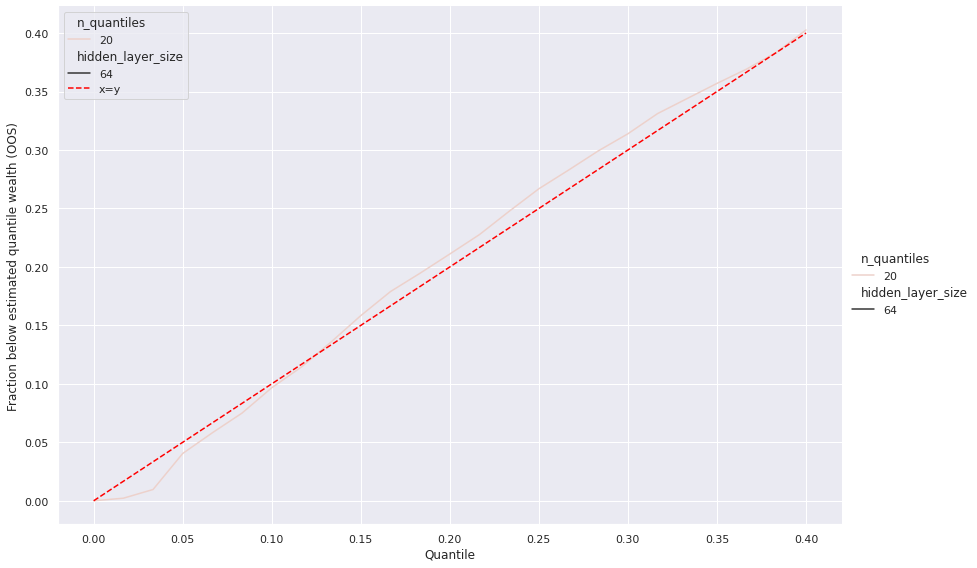

In [51]:

to_plot = quantile_rates[quantile_rates.dataset=='test']
fg = sns.relplot(
    data=to_plot, x='quantile', y='actual_below_estimated', hue='n_quantiles', 
    style='hidden_layer_size', kind='line',
    legend=True, aspect=12/8, height=8
)
for ax in fg.figure.axes:
    
    sns.lineplot(
        data=to_plot,
        x='quantile', y='quantile',
        color='red',
        linestyle='--',
        label='x=y',
        ax=ax,
        legend=True
    )
fg.set(xlabel='Quantile', ylabel='Fraction below estimated quantile wealth (OOS)')